In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#打开交互模式
%matplotlib notebook 
from matplotlib.animation import FuncAnimation

# easy example

In [3]:
# asin(x,a) = a*sin(x/a)
def asin(x,a): # x is a list
    return np.sin(x/a)*a

def linear(x,a):
    return a*x*10

#用来连续变化的参数a
step = 0.01
steps = np.arange(0,2,step) # a 的取值
#list x,横坐标 
x = np.linspace(-5,5,1000)

<IPython.core.display.Javascript object>


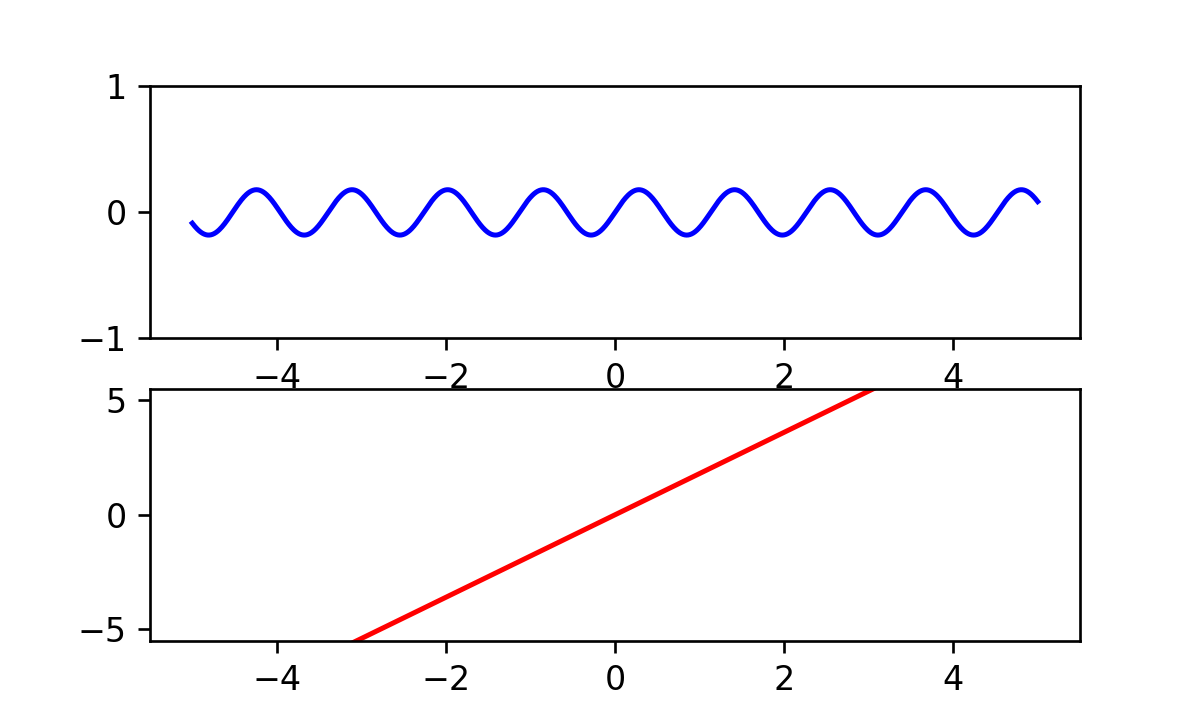

In [7]:
# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,3)) #figure看成总名称，ax1是第一个subplot的句柄

#上面这句话等价于下面三句
# fig = plt.figure(figsize=(5,3))
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)


# creating our line objects for the plots
#随便画什么都可以
#line1后面一定要有逗号！！！！！！！
line1, = ax1.plot(x, x, '-b') #line1是一个Line2D的object,看成是要画的那个曲线，有x,y坐标
line2, = ax2.plot(x, x, '-r')

def animate(B):
    """
    这个函数的目的是告诉FuncAnimation每次图形应该怎么变化
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: 就是上面的sin和linear每次输入的a(每次输入的a都不一样)
    
    return:
        sinc: ydata
        box: ydata
    """
    
    #每次都要更新line1和line2
    #每次画图时候都是在line1这个曲线上面改变，改变的是它的y值
    line1.set_ydata(asin(x,B))
    line2.set_ydata(linear(x,B))
    
#     adjust the sinc plot height in a loop,可以自适应高度
#     ax1.set_ylim(np.min(asin(x,B)), np.max(asin(x,B)))
    

def init():
    """
    initialize the figure
    """
    #这里应该设置一下y_lim,因为一开始的line1是乱画的，后面要话的图像不一定在这个乱画图像的range中，或者不合适
    ax1.set_ylim(-1,1)
    return line1,line2 #画图时候实际上是对line1和line2进行更改

# the FuncAnimation function iterates through our animate function using the steps array
#steps是每次输入animate的参数，interval单位是ms
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()